<a href="https://colab.research.google.com/github/shikhasingh19611/datamining/blob/main/Shikha_Singh_RBa124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_excel('/content/Mc_Donalds (1) (1).xlsx', sheet_name = 'Sheet3')

In [ ]:
data

,Country,Big Mac Price,New Hourly Wage
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35
5,Chile,1.96,2.80
6,China,1.20,2.40
7,Czech Republic,1.96,2.40
8,Denmark,4.09,14.40
9,Euro area,2.98,9.59


In [ ]:
data.head(10)

,Country,Big Mac Price,New Hourly Wage
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35
5,Chile,1.96,2.80
6,China,1.20,2.40
7,Czech Republic,1.96,2.40
8,Denmark,4.09,14.40
9,Euro area,2.98,9.59


In [ ]:
data.describe()

,Big Mac Price,New Hourly Wage
count,27.000000,27.000000
mean,2.238889,6.058889
std,0.844627,4.903372
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.500000


In [ ]:
data.describe(include= 'object') #for categorical data

,Country
count,27
unique,27
top,Argentina
freq,1


In [ ]:
#check for duplicates
data.duplicated().sum()

0

In [ ]:
#check for missing values
data.isnull().sum()

,0
Country,0
Big Mac Price,0
New Hourly Wage,0


<Axes: >

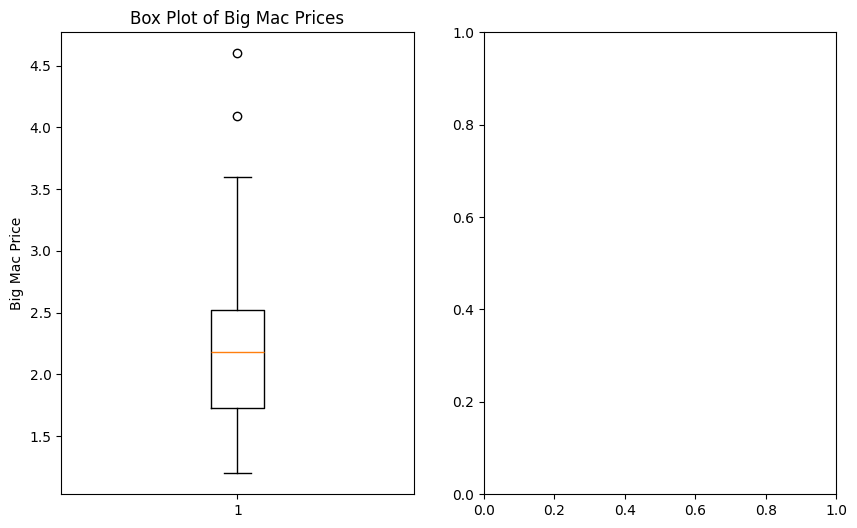

In [ ]:
#box plot to check skewness and outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.boxplot(data["Big Mac Price"])
plt.title("Box Plot of Big Mac Prices")
plt.ylabel("Big Mac Price")

plt.subplot(1,2,2)

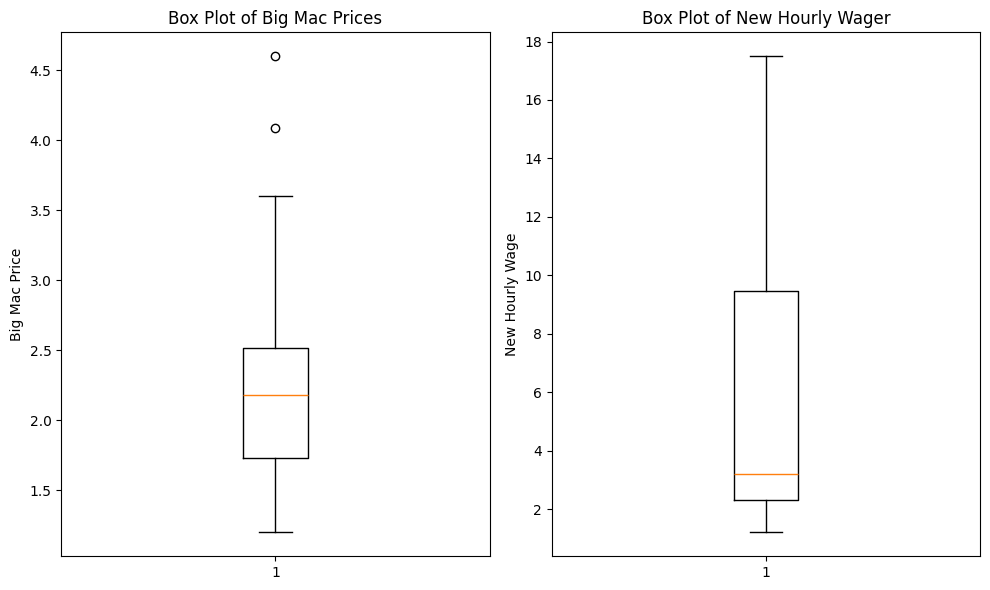

In [ ]:
#box plot to check skweness and ouliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.boxplot(data["Big Mac Price"])
plt.title("Box Plot of Big Mac Prices")
plt.ylabel("Big Mac Price")

plt.subplot(1,2,2)
plt.boxplot(data["New Hourly Wage"])
plt.title("Box Plot of New Hourly Wager")
plt.ylabel("New Hourly Wage")

plt.tight_layout()
plt.show()

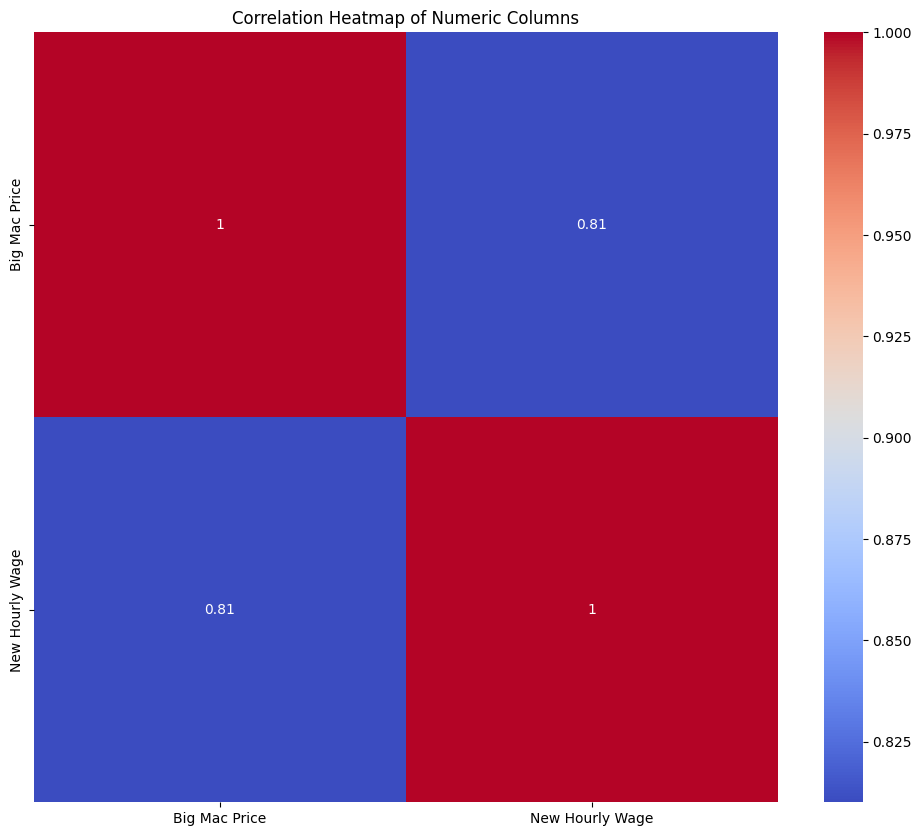

In [ ]:
#extraxt heatmap on numeric col
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data.select_dtypes(include=['number'])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [ ]:
#let dependent variable y be new hourly wage and independent variable x be Bi mac price
import matplotlib.pyplot as plt
import statsmodels.api as sm

#define the dependent and independent variable
y = data['New Hourly Wage']
x = data['Big Mac Price']

In [ ]:
x

,Big Mac Price
0,1.42
1,1.86
2,1.48
3,3.14
4,2.21
5,1.96
6,1.20
7,1.96
8,4.09
9,2.98


In [ ]:
y


,New Hourly Wage
0,1.70
1,7.80
2,2.05
3,12.30
4,9.35
5,2.80
6,2.40
7,2.40
8,14.40
9,9.59


In [ ]:
#prompt extract simple linear regression on x and y(use stats model)
#add a constant to the independent variable for the intercept term
x = sm.add_constant(x)

#fit the linear regression model (ordinary least square method ols)
model = sm.OLS(y, x).fit()

#print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        New Hourly Wage   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     47.73
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           3.05e-07
Time:                        08:06:49   Log-Likelihood:                -66.314
No. Observations:                  27   AIC:                             136.6
Df Residuals:                      25   BIC:                             139.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.4704      1.625     -2.751

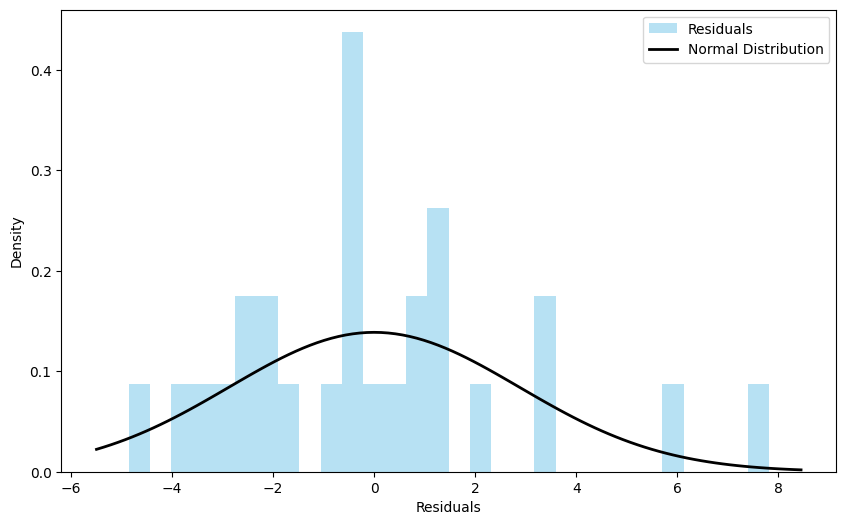

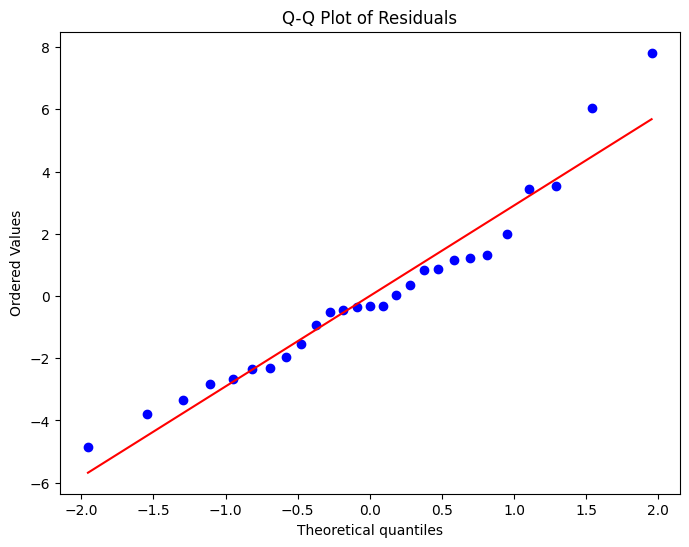

In [ ]:
#check distribution of residual
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#get the residuals fromm the model
residuals = model.resid

#create a histogram of the residuals
plt.figure(figsize=(10,6 ))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='skyblue', label='Residuals')
xmin, xmax  = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show

#create a Q-Q plot of the residuals
plt.figure(figsize=(8,6 ))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

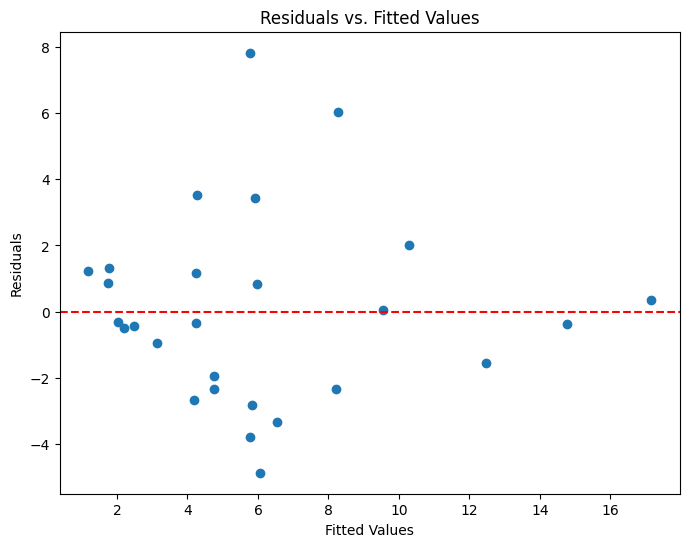

In [ ]:
# prompt: check for homoscedasticity using scatter plot

# Create a scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [ ]:
# prompt: conduct white for testing homoscedasticity

# Perform White's test for heteroscedasticity
from statsmodels.stats.diagnostic import het_white

white_test = het_white(residuals, model.model.exog)

# Print the results of the White's test
print(f"Lagrange Multiplier statistic: {white_test[0]}")
print(f"p-value: {white_test[1]}")
print(f"Degrees of Freedom: {white_test[2]}")


# Interpret the results
alpha = 0.05  # Significance level

if white_test[1] < alpha:
    print("\nThe p-value is less than the significance level. We reject the null hypothesis.")
    print("There is evidence of heteroscedasticity in the residuals.")
else:
    print("\nThe p-value is greater than the significance level. We fail to reject the null hypothesis.")
    print("There is no evidence of heteroscedasticity in the residuals.")


Lagrange Multiplier statistic: 4.685184238152141
p-value: 0.096078268859063
Degrees of Freedom: 2.5195014584861624

The p-value is greater than the significance level. We fail to reject the null hypothesis.
There is no evidence of heteroscedasticity in the residuals.


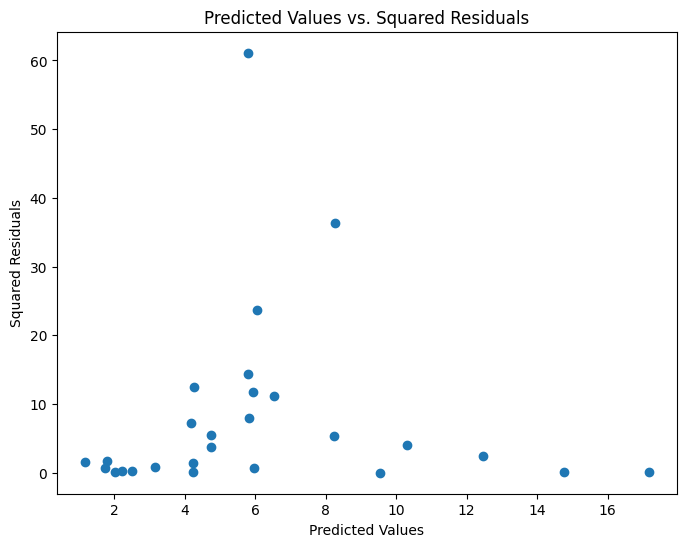

In [ ]:
# prompt: plot predicted values vs squared residuals

# Plot predicted values vs. squared residuals
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals**2)
plt.xlabel("Predicted Values")
plt.ylabel("Squared Residuals")
plt.title("Predicted Values vs. Squared Residuals")
plt.show()
